In [1]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

In [2]:
# hyper parameters
EPOCH = 1
BATCH_SIZE = 50
LR = 0.01
DOWNLOAD_MNIST = False

In [3]:
train_data = torchvision.datasets.MNIST(
    root="./mnist", 
    train=True, 
    transform=torchvision.transforms.ToTensor(), # [0, 1]
    download=DOWNLOAD_MNIST
)

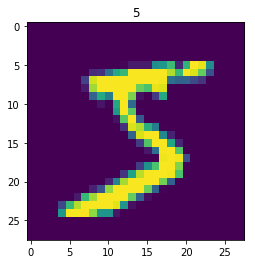

In [4]:
# plot one example
plt.imshow(train_data.data[0].numpy())
plt.title(train_data.targets[0].numpy())
plt.show()

In [5]:
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

In [6]:
test_data = torchvision.datasets.MNIST(root="./mnist", train=False)
test_x = torch.unsqueeze(test_data.data.type(torch.FloatTensor)[: 2000] / 255., dim=1)
test_y = test_data.targets[: 2000]

In [7]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2), # padding = (kernel_size-1) / 2
            nn.ReLU(),
            nn.BatchNorm2d(16, momentum=0.1),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2),
            nn.ReLU(),
            nn.BatchNorm2d(32, momentum=0.1),
            nn.MaxPool2d(2),
        )
        self.out = nn.Sequential(
            nn.Linear(32 * 7 * 7, 10),
            nn.Softmax(dim=1)
        )
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x) # (batch, 32, 7, 7)
        x = x.view(x.size(0), -1) # (batch, 32 * 7 * 7)
        output = self.out(x)
        return output

In [8]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Sequential(
    (0): Linear(in_features=1568, out_features=10, bias=True)
    (1): Softmax()
  )
)


In [10]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):
        output = cnn(x)
        loss = loss_func(output, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step % 100 == 0:
            test_output = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.numpy()
            accuracy = sum(pred_y == test_y.data.numpy()) / test_y.size(0)
            print("Epoch: ", epoch, "| train loss: {0}".format(loss.data.numpy()), "| test_accuracy: {0}".format(accuracy))

Epoch:  0 | train loss: 1.6421200037002563 | test_accuracy: 0.7745
Epoch:  0 | train loss: 1.6011419296264648 | test_accuracy: 0.7655
Epoch:  0 | train loss: 1.7191828489303589 | test_accuracy: 0.7585
Epoch:  0 | train loss: 1.6795125007629395 | test_accuracy: 0.7695
Epoch:  0 | train loss: 1.6255284547805786 | test_accuracy: 0.8465
Epoch:  0 | train loss: 1.5390944480895996 | test_accuracy: 0.847
Epoch:  0 | train loss: 1.510298490524292 | test_accuracy: 0.8695
Epoch:  0 | train loss: 1.6014024019241333 | test_accuracy: 0.866
Epoch:  0 | train loss: 1.6211459636688232 | test_accuracy: 0.8525
Epoch:  0 | train loss: 1.621128797531128 | test_accuracy: 0.8535
Epoch:  0 | train loss: 1.521150827407837 | test_accuracy: 0.854
Epoch:  0 | train loss: 1.5487576723098755 | test_accuracy: 0.872
